# License Plate Optical Character Recognition

## Import libraries and test CUDA

In [ ]:
!pip install paddlepaddle paddleocr

In [4]:
import numpy as np
import os
import csv
import glob
from matplotlib import pyplot as plt
from paddleocr import PaddleOCR, draw_ocr

In [8]:
!unzip /content/USLicensePlateOCR-main.zip

unzip:  cannot find or open /content/USLicensePlateOCR-main.zip, /content/USLicensePlateOCR-main.zip.zip or /content/USLicensePlateOCR-main.zip.ZIP.


In [5]:
!unzip compressed.zip

Archive:  compressed.zip
   creating: content/val/compressed/
   creating: content/val/compressed/cheng2020-attn-q1/
  inflating: content/val/compressed/cheng2020-attn-q1/wi580.jpg  
  inflating: content/val/compressed/cheng2020-attn-q1/ar477.jpg  
  inflating: content/val/compressed/cheng2020-attn-q1/tn1659.jpg  
  inflating: content/val/compressed/cheng2020-attn-q1/ms1062.jpg  
  inflating: content/val/compressed/cheng2020-attn-q1/sd983.jpg  
  inflating: content/val/compressed/cheng2020-attn-q1/pa1183.jpg  
  inflating: content/val/compressed/cheng2020-attn-q1/dc1008.jpg  
  inflating: content/val/compressed/cheng2020-attn-q1/nh1470.jpg  
  inflating: content/val/compressed/cheng2020-attn-q1/nm922.jpg  
  inflating: content/val/compressed/cheng2020-attn-q1/ok1101.jpg  
  inflating: content/val/compressed/cheng2020-attn-q1/la1213.jpg  
  inflating: content/val/compressed/cheng2020-attn-q1/ak848.jpg  
  inflating: content/val/compressed/cheng2020-attn-q1/nv698.jpg  
  inflating: conte

In [6]:
!unzip val.zip

Archive:  val.zip
   creating: val copy/
  inflating: __MACOSX/._val copy     
  inflating: val copy/wy716.png      
  inflating: val copy/or1623.png     
  inflating: val copy/nj937.png      
  inflating: val copy/wi1588.png     
  inflating: val copy/nh932.png      
  inflating: val copy/va82.png       
  inflating: val copy/ok556.png      
  inflating: val copy/ky476.png      
  inflating: val copy/ma142.png      
  inflating: val copy/in1334.png     
  inflating: val copy/ma1230.png     
  inflating: val copy/me1628.png     
  inflating: val copy/nh1470.png     
  inflating: val copy/wa1412.png     
  inflating: val copy/nd662.png      
  inflating: val copy/nj1428.png     
  inflating: val copy/ny524.png      
  inflating: val copy/ca857.png      
  inflating: val copy/dc1038.png     
  inflating: val copy/va1365.png     
  inflating: val copy/nv940.png      
  inflating: val copy/nc1407.png     
  inflating: val copy/ca884.png      
  inflating: val copy/al1528.png     
  inflati

In [9]:
!unzip train_data.zip

Archive:  train_data.zip
   creating: train_data/
  inflating: train_data/data_preprocess.ipynb  
  inflating: train_data/.DS_Store    
  inflating: __MACOSX/train_data/._.DS_Store  
  inflating: train_data/groundtruth.csv  
   creating: train_data/val copy/
  inflating: __MACOSX/train_data/._val copy  
  inflating: train_data/train_list.txt  
   creating: train_data/usimages/
   creating: train_data/train/
  inflating: train_data/val_list.txt  
  inflating: train_data/val copy.zip  
  inflating: __MACOSX/train_data/._val copy.zip  
   creating: train_data/val/
  inflating: __MACOSX/train_data/._val  
  inflating: train_data/val copy/wy716.png  
  inflating: train_data/val copy/or1623.png  
  inflating: train_data/val copy/nj937.png  
  inflating: train_data/val copy/wi1588.png  
  inflating: train_data/val copy/nh932.png  
  inflating: train_data/val copy/va82.png  
  inflating: train_data/val copy/ok556.png  
  inflating: train_data/val copy/ky476.png  
  inflating: train_data/val co

## Benchmark data overview

In [10]:
def label_reader(file_path):
    true_labels = {}

    with open(file_path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            true_labels[row[0]] = row[1]

    return true_labels

true_labels = label_reader('/content/train_data/groundtruth.csv')
len(true_labels)

751

## Ignoring invalid data labels

After looking at the data, I found that there are incorrect labels for some license plates. If the license plate contains only number 0 (say a license plate is 000000), then the label will just be '0', which is incorrect. In the benchmark, I will remove these incorrect samples in `train_data/data_preprocess.ipynb`.

Now 746 valid images are used to train and evaluate.

## Test PaddleOCR for character recognition.
### Using 2-step inference: Differential Binarization (text detection) + CRNN (text recognition)
### Without fine-tuning

In [12]:
# Without fine-tuning text recognition
ocr = PaddleOCR(lang="en", show_log=False)

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 3910/3910 [00:16<00:00, 242.23it/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10000/10000 [00:18<00:00, 551.47it/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2138/2138 [00:15<00:00, 141.22it/s]


### View original recognition (check the img path)

[[[[[106.0, 7.0], [174.0, 15.0], [172.0, 37.0], [103.0, 30.0]],
   ('LOWA', 0.8636412024497986)],
  [[[44.0, 35.0], [244.0, 35.0], [244.0, 100.0], [44.0, 100.0]],
   ('696.PAT', 0.8819103240966797)],
  [[[121.0, 106.0], [156.0, 106.0], [156.0, 120.0], [121.0, 120.0]],
   ('LINN', 0.9959881901741028)]]]

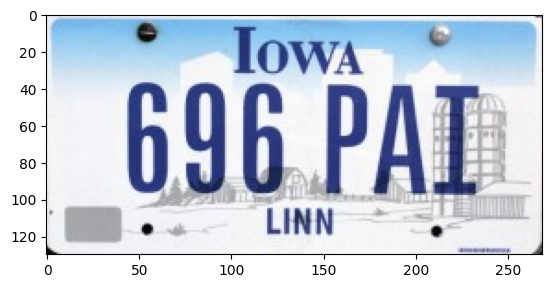

In [131]:
img_path = '/content/train_data/usimages/ia462.png'
# /content/train_data/val copy/nc216.png
img = plt.imread(img_path)
plt.imshow(img)

# Suppress warning messages
import logging
from ppocr.utils.logging import get_logger as ppocr_get_logger
ppocr_get_logger().setLevel(logging.ERROR)

result = ocr.ocr(img_path)
result

### View compressed recognition (check the img path)

[[[[[106.0, 8.0], [174.0, 11.0], [173.0, 36.0], [105.0, 33.0]],
   ('LOWA', 0.9420198202133179)],
  [[[45.0, 37.0], [239.0, 37.0], [239.0, 98.0], [45.0, 98.0]],
   ('696.PAI', 0.8836365342140198)],
  [[[119.0, 103.0], [158.0, 103.0], [158.0, 121.0], [119.0, 121.0]],
   ('LINN', 0.9958170652389526)]]]

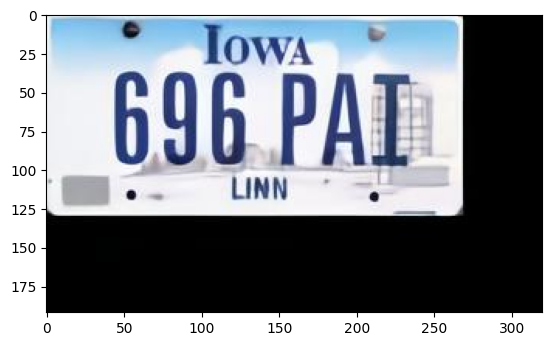

In [130]:
img_path = '/content/content/val/compressed/cheng2020-anchor-q1/ia462.jpg'
img = plt.imread(img_path)
plt.imshow(img)

# Suppress warning messages
import logging
from ppocr.utils.logging import get_logger as ppocr_get_logger
ppocr_get_logger().setLevel(logging.ERROR)

result = ocr.ocr(img_path)
result

## PaddleOCR Benchmark

In [16]:
def predict(img_path, reader):
     # this needs to run only once to load the model into memory
    result = reader.ocr(img_path)
    img = plt.imread(img_path)

    # Check if there are no results
    if not result[0]:
        return '0'

    output = []
    for i in range(len(result[0])):
        bbox = result[0][i][0]
        assert len(bbox) == 4, "A bounding box should contain 4 coordinates, got " + str(len(bbox))

        length = np.abs(bbox[1][0] - bbox[0][0])
        width = np.abs(bbox[2][1] - bbox[1][1])
        y_axis = np.average([bbox[0][1], bbox[1][1], bbox[2][1], bbox[3][1]])

        output.append((bbox, result[0][i][1][0], length * width, y_axis))

    pred = None
    max_area = max(output,key=lambda item:item[2])
    max_index = output.index(max_area)
    threshold = img.shape[0] // 8

    for i in range(len(output)):
        if i != max_index and np.abs(output[i][3] - output[max_index][3]) <= 15 and \
           np.abs(output[i][2] - output[max_index][2]) <= 7000 and \
           (np.abs(output[i][0][1][1] - output[max_index][0][0][1]) <= threshold or np.abs(output[i][0][0][1] - output[max_index][0][1][1]) <= threshold):

            if output[i][0][0][0] < output[max_index][0][0][0]:
                pred = output[i][1] + output[max_index][1]
            else:
                pred = output[max_index][1] + output[i][1]

    if not pred:
        pred = output[max_index][1]

    pred

    return pred

## Measure accuracy on all images

In [18]:
all_images = glob.glob(os.path.join('/content/train_data/usimages', '*.png'))
incorrect_samples = []
num_correct = 0
total_num = len(all_images)
for img in all_images:
    pred_label = predict(img, ocr)
    pred_label = "".join(ch.upper() for ch in pred_label if ch.isalnum())

    img_id = img.split('/')[-1]
    if pred_label == true_labels[img_id]:
        num_correct += 1
    else:
        incorrect_samples.append((img, pred_label))

print('The final accuracy is %.2f%%' % ((num_correct / total_num) * 100))

# The final accuracy is 82.98%

The final accuracy is 82.98%


In [134]:
original_images = glob.glob(os.path.join('/content/train_data/usimages', '*.png'))  # Get all JPGs
incorrect_samples = []
num_correct = 0

for img in original_images:
    # 1. Get base filename (without .jpg extension)
    img_id = os.path.splitext(os.path.basename(img))[0]

    # 2. Find matching PNG key in true_labels
    true_key = f"{img_id}.png"  # Construct expected PNG key

    if true_key not in true_labels:
        print(f"Missing label for: {img_id} (expected {true_key})")
        continue

    # 3. Process the image
    pred_label = predict(img, ocr)
    pred_label = "".join(ch.upper() for ch in pred_label if ch.isalnum())

    # 4. Compare with ground truth
    if pred_label == true_labels[true_key]:
        num_correct += 1
    else:
        incorrect_samples.append((img_id, pred_label, true_labels[true_key]))

# Calculate accuracy only for labeled images
total_labeled = len([img for img in original_images
                    if f"{os.path.splitext(os.path.basename(img))[0]}.png" in true_labels])

print(f'\nFinal Accuracy: {num_correct}/{total_labeled} ({num_correct/total_labeled:.4%})')


Final Accuracy: 619/746 (82.9759%)


In [135]:
incorrect_samples_original = incorrect_samples

In [136]:
incorrect_samples_original

[('mi172', 'DONOR', 'D0N0R'),
 ('ma142', 'R72LY', '72LY'),
 ('ct362', 'WHO515', 'WH0515'),
 ('ms1447', 'QTA8', 'QTA827'),
 ('il1102', '597144', '5977144'),
 ('wy1093', '99YX', '299YX'),
 ('wy712', '447794', '4779'),
 ('nv698', 'LTLGTO', 'LTLGT0'),
 ('id1645', '164081', 'I64081'),
 ('ri892', 'V0820', 'VO820'),
 ('or795', '04503', '4503'),
 ('ma948', 'F16FF', '16FF'),
 ('nh1273', 'SOX1FAN', 'S0X1FAN'),
 ('in1334', 'BEGODS', 'BEG0DS'),
 ('il1587', 'CHICAGO', 'CHICAG0'),
 ('or1303', '09144', '9144'),
 ('id1409', 'SQUAN', 'SQUAW'),
 ('in1184', 'ANYTEXTE', 'ANYTEXT'),
 ('ct455', 'CONNMAN', 'C0NNMAN'),
 ('mi309', 'AAOOA', 'AA00A'),
 ('ms456', 'HNP3739', 'HNP739'),
 ('mi242', 'GOLEING', 'G0LFING'),
 ('id991', '8108565', '108565'),
 ('wa316', '953ZY', '953TZY'),
 ('nv100', 'LUVPOKR', 'LUVP0KR'),
 ('ms1342', 'G026W', 'G026'),
 ('la275', 'TAFF389', 'TAF389'),
 ('ms1551', 'MN3934', 'N3934'),
 ('ca1564', '5A0J230', '5AOJ230'),
 ('ga1260', 'BJL3833', 'BJL833'),
 ('vt370', 'BRRRRE', 'BRRRR'),
 ('il39

### Convinient function to check if image in both directory matches

In [95]:
import os

def compare_dirs(dir1, dir2):
    """Check if two directories contain files with the same base names, ignoring extensions."""
    # Get all files in each directory (ignoring subfolders)
    files1 = {os.path.splitext(f)[0] for f in os.listdir(dir1) if os.path.isfile(os.path.join(dir1, f))}
    files2 = {os.path.splitext(f)[0] for f in os.listdir(dir2) if os.path.isfile(os.path.join(dir2, f))}

    # Find differences
    unique_to_dir1 = files1 - files2
    unique_to_dir2 = files2 - files1

    if not unique_to_dir1 and not unique_to_dir2:
        print("✅ Both directories contain the same set of files (ignoring extensions)")
        return True
    else:
        print("❌ Directory contents differ:")
        if unique_to_dir1:
            print(f"Files only in {dir1}: {sorted(unique_to_dir1)[:5]}... ({len(unique_to_dir1)} total)")
        if unique_to_dir2:
            print(f"Files only in {dir2}: {sorted(unique_to_dir2)[:5]}... ({len(unique_to_dir2)} total)")
        return False

# Usage example
dir_original = '/content/val copy'
dir_compressed = '/content/content/val/compressed/cheng2020-anchor-q1'
compare_dirs(dir_original, dir_compressed)

✅ Both directories contain the same set of files (ignoring extensions)


True

## Identify fail cases (use incorrect sample as variable) (Ad hoc)

In [99]:
index = np.random.randint(0, len(incorrect_samples)-1)
actual = true_labels[incorrect_samples[index][0].split('/')[-1]]
incorrect_samples[index][0]

KeyError: 'wy322'

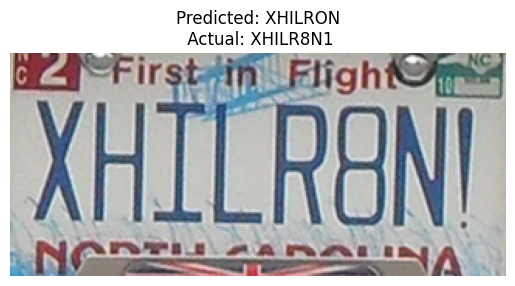

In [23]:
plt.axis('off')
plt.title('Predicted: ' + incorrect_samples[index][1] + '\n Actual: ' + actual)
plt.imshow(plt.imread(incorrect_samples[index][0]))

# Accuracy Full dataset

In [121]:
!unzip /content/compressed_full.zip

Archive:  /content/compressed_full.zip
caution: filename not matched:  /content/compressed_full


In [123]:
import os
import glob
from tqdm import tqdm

# Configuration
base_dir = '/content/content/usimages/compressed'
compression_models = ['cheng2020-anchor', 'cheng2020-attn']
quality_levels = ['q1', 'q3', 'q6']

# Storage dictionaries
results = {}
incorrect_samples_dict = {}  # Stores ALL incorrect samples in your specified format

for model in compression_models:
    for quality in quality_levels:
        config_name = f"{model}-{quality}"
        dir_path = os.path.join(base_dir, config_name)
        comp_images = glob.glob(os.path.join(dir_path, '*.jpg'))

        # Initialize storage for this config
        incorrect_samples_dict[config_name] = []
        num_correct = 0

        for img in tqdm(comp_images, desc=f"Processing {config_name}"):
            img_id = os.path.splitext(os.path.basename(img))[0]
            true_key = f"{img_id}.png"

            if true_key not in true_labels:
                continue  # Skip unlabeled images

            pred_label = predict(img, ocr)
            pred_label = "".join(ch.upper() for ch in pred_label if ch.isalnum())  # Your exact cleaning

            if pred_label == true_labels[true_key]:
                num_correct += 1
            else:
                # Your exact format: (img_id, predicted_label, true_label)
                incorrect_samples_dict[config_name].append((img_id, pred_label, true_labels[true_key]))

        # Calculate accuracy
        total_labeled = len([img for img in comp_images
                          if f"{os.path.splitext(os.path.basename(img))[0]}.png" in true_labels])

        if total_labeled > 0:
            results[config_name] = {
                'accuracy': num_correct / total_labeled,
                'errors': len(incorrect_samples_dict[config_name]),
                'total': total_labeled
            }

Processing cheng2020-attn-q6: 100%|██████████| 746/746 [06:30<00:00,  1.91it/s]


In [128]:
# Full results
print("\n=== FINAL ACCURACIES ===")
for config, data in sorted(results.items()):
    print(f"{config}: {data['accuracy']:.4%} | Errors: {data['errors']}/{data['total']}")


=== FINAL ACCURACIES ===
cheng2020-anchor-q1: 83.6461% | Errors: 122/746
cheng2020-anchor-q3: 84.1823% | Errors: 118/746
cheng2020-anchor-q6: 83.5121% | Errors: 123/746
cheng2020-attn-q1: 82.1716% | Errors: 133/746
cheng2020-attn-q3: 82.7078% | Errors: 129/746
cheng2020-attn-q6: 82.8418% | Errors: 128/746


In [129]:
# Anchor model errors
all_anchor_q1_errors = incorrect_samples_dict['cheng2020-anchor-q1']
all_anchor_q3_errors = incorrect_samples_dict['cheng2020-anchor-q3']
all_anchor_q6_errors = incorrect_samples_dict['cheng2020-anchor-q6']

# Attention model errors
all_attn_q1_errors = incorrect_samples_dict['cheng2020-attn-q1']
all_attn_q3_errors = incorrect_samples_dict['cheng2020-attn-q3']
all_attn_q6_errors = incorrect_samples_dict['cheng2020-attn-q6']

In [146]:
import pandas as pd

# Create a list to hold all error records
error_records = []

# Process Anchor models
for model in ['cheng2020-anchor-q1', 'cheng2020-anchor-q3', 'cheng2020-anchor-q6']:
    for img_id, pred, true in incorrect_samples_dict[model]:
        error_records.append({
            'model': model,
            'image_id': img_id,
            'predicted': pred,
            'true_label': true,
            'model_type': 'anchor'
        })

# Process Attention models
for model in ['cheng2020-attn-q1', 'cheng2020-attn-q3', 'cheng2020-attn-q6']:
    for img_id, pred, true in incorrect_samples_dict[model]:
        error_records.append({
            'model': model,
            'image_id': img_id,
            'predicted': pred,
            'true_label': true,
            'model_type': 'attention'
        })

# Convert to DataFrame and save
error_df = pd.DataFrame(error_records)
error_df.to_csv('compression_error_samples.csv', index=False)

print(f"Saved {len(error_df)} error samples to compression_error_samples.csv")

Saved 753 error samples to compression_error_samples.csv


In [ ]:

# === FINAL ACCURACIES ===
# cheng2020-anchor-q1: 83.6461% | Errors: 122/746
# cheng2020-anchor-q3: 84.1823% | Errors: 118/746
# cheng2020-anchor-q6: 83.5121% | Errors: 123/746
# cheng2020-attn-q1: 82.1716% | Errors: 133/746
# cheng2020-attn-q3: 82.7078% | Errors: 129/746
# cheng2020-attn-q6: 82.8418% | Errors: 128/746

In [ ]:
#original 82.98%

## Break

In [101]:
incorrect_samples_val = incorrect_samples
incorrect_samples_val

[('ma142', 'R72LY', '72LY'),
 ('nv698', 'LTLGTO', 'LTLGT0'),
 ('ri892', 'V0820', 'VO820'),
 ('or795', '04503', '4503'),
 ('in1334', 'BEGODS', 'BEG0DS'),
 ('ct455', 'CONNMAN', 'C0NNMAN'),
 ('id991', '8108565', '108565'),
 ('wa316', '953ZY', '953TZY'),
 ('ms1342', 'G026W', 'G026'),
 ('vt370', 'BRRRRE', 'BRRRR'),
 ('il393', '23060', 'A323060'),
 ('or526', 'N0O617', '617'),
 ('nc969', 'SWEEITHING', 'SWEETTHING'),
 ('wy963', '339C', '4339C'),
 ('va558', 'IRZYSHR', 'JRZYSHR'),
 ('nc216', 'XHILRON', 'XHILR8N1'),
 ('ma78', 'I4CV10', '14CV10'),
 ('ok556', '093G0K', '093GOK'),
 ('va398', 'ANTIGOV', 'ANTIG0V'),
 ('wv496', '0EC617', 'OEC617'),
 ('wy322', '1692', '692'),
 ('mn764', 'BTOOO', 'BT000'),
 ('id254', 'BLOGGER', 'BL0GGER'),
 ('tn1659', '005GEN', '005GFN'),
 ('id140', 'DELIGRI', 'DELIGRL'),
 ('fl512', 'CUSCSTOM', 'CUST0M'),
 ('wy1083', '434R', '4434R'),
 ('ca884', 'LEGO', 'ILEG0'),
 ('ia462', '696PAT', '696PAI'),
 ('id1280', 'IDAHOHI', 'IDAH0HI'),
 ('md1585', '976BBC', '976BB0'),
 ('ga151'

# Analysis val dataset (skipped)

In [51]:
val_images = glob.glob(os.path.join('/content/content/val/compressed/cheng2020-anchor-q6', '*.jpg'))  # Get all JPGs
incorrect_samples = []
num_correct = 0

for img in val_images:
    # 1. Get base filename (without .jpg extension)
    img_id = os.path.splitext(os.path.basename(img))[0]

    # 2. Find matching PNG key in true_labels
    true_key = f"{img_id}.png"  # Construct expected PNG key

    if true_key not in true_labels:
        print(f"Missing label for: {img_id} (expected {true_key})")
        continue

    # 3. Process the image
    pred_label = predict(img, ocr)
    pred_label = "".join(ch.upper() for ch in pred_label if ch.isalnum())

    # 4. Compare with ground truth
    if pred_label == true_labels[true_key]:
        num_correct += 1
    else:
        incorrect_samples.append((img_id, pred_label, true_labels[true_key]))

# Calculate accuracy only for labeled images
total_labeled = len([img for img in val_images
                    if f"{os.path.splitext(os.path.basename(img))[0]}.png" in true_labels])

print(f'\nFinal Accuracy: {num_correct}/{total_labeled} ({num_correct/total_labeled:.4%})')


Final Accuracy: 116/146 (79.4521%)


In [43]:
pred_label

'MNA6704'

In [45]:
img_id

'nc946.jpg'

In [44]:
true_labels[img_id]

KeyError: 'nc946.jpg'

In [52]:
import os
import glob
from tqdm import tqdm

# Configuration
base_dir = '/content/content/val/compressed'
compression_types = ['cheng2020-anchor', 'cheng2020-attn']
quality_levels = ['q1', 'q3', 'q6']

# Store results
results = {}

for comp_type in compression_types:
    for quality in quality_levels:
        # Get all JPGs in the compression directory
        dir_path = os.path.join(base_dir, f'{comp_type}-{quality}')
        val_images = glob.glob(os.path.join(dir_path, '*.jpg'))

        if not val_images:
            print(f" No JPGs found in {dir_path}")
            continue

        incorrect_samples = []
        num_correct = 0

        # Process each image
        for img in tqdm(val_images, desc=f'{comp_type}-{quality}'):
            img_id = os.path.splitext(os.path.basename(img))[0]
            true_key = f"{img_id}.png"

            if true_key not in true_labels:
                continue

            pred_label = predict(img, ocr)
            pred_label = "".join(ch.upper() for ch in pred_label if ch.isalnum())

            if pred_label == true_labels[true_key]:
                num_correct += 1
            else:
                incorrect_samples.append((img_id, pred_label, true_labels[true_key]))

        # Calculate accuracy
        total_labeled = len([img for img in val_images
                           if f"{os.path.splitext(os.path.basename(img))[0]}.png" in true_labels])

        if total_labeled > 0:
            accuracy = num_correct / total_labeled
            results[f'{comp_type}-{quality}'] = {
                'accuracy': accuracy,
                'errors': len(incorrect_samples),
                'total': total_labeled
            }

# Print results
print("\n=== COMPRESSION BENCHMARK RESULTS ===")
for config, data in sorted(results.items()):
    print(f"{config}: {data['accuracy']:.4%} | Errors: {data['errors']}/{data['total']}")

# Optional: Save to CSV
import pandas as pd
pd.DataFrame.from_dict(results, orient='index').to_csv('compression_results.csv')

cheng2020-attn-q6: 100%|██████████| 146/146 [01:15<00:00,  1.94it/s]



=== COMPRESSION BENCHMARK RESULTS ===
cheng2020-anchor-q1: 82.8767% | Errors: 25/146
cheng2020-anchor-q3: 80.8219% | Errors: 28/146
cheng2020-anchor-q6: 79.4521% | Errors: 30/146
cheng2020-attn-q1: 81.5068% | Errors: 27/146
cheng2020-attn-q3: 82.1918% | Errors: 26/146
cheng2020-attn-q6: 80.8219% | Errors: 28/146


In [54]:
index = np.random.randint(0, len(incorrect_samples)-1)
actual = true_labels[incorrect_samples[index][0].split('/')[-1]]
incorrect_samples[index][0]

KeyError: 'md1585'


index: 15
Image: nc216
Predicted: XHILRON
Actual: XHILR8N1



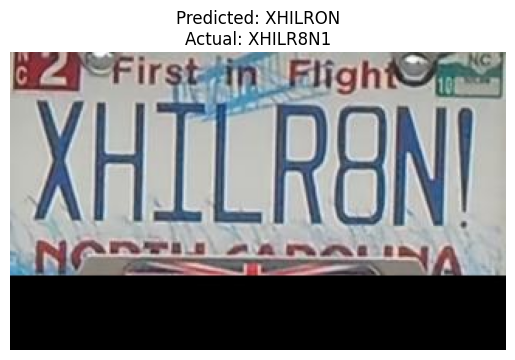

In [96]:
import numpy as np

# Get random incorrect sample (img_id is already extension-less from your earlier code)
index = np.random.randint(0, len(incorrect_samples))
img_id, pred_label, true_label = incorrect_samples[index]  # Unpack all values at once

# Get image path (assuming compressed are JPGs)
img_path = f"/content/content/val/compressed/cheng2020-attn-q6/{img_id}.jpg"  # Simple path construction

print(f"""
index: {index}
Image: {img_id}
Predicted: {pred_label}
Actual: {true_label}
""")

# Plot with corrected labels
plt.imshow(plt.imread(img_path))
plt.axis('off')
plt.title(f'Predicted: {pred_label}\nActual: {true_label}')
plt.show()


bird nc610

In [78]:
index = 2
actual = true_labels[incorrect_samples[index][0].split('/')[-1]]
incorrect_samples[index][0]

KeyError: 'ok556'

In [ ]:
plt.axis('off')
plt.title('Predicted: ' + incorrect_samples[index][1] + '\n Actual: ' + actual)
plt.imshow(plt.imread(incorrect_samples[index][0]))

In [ ]:
# cheng2020-anchor-q1: 100%|██████████| 146/146 [01:16<00:00,  1.91it/s]
# cheng2020-anchor-q3: 100%|██████████| 146/146 [01:15<00:00,  1.93it/s]
# cheng2020-anchor-q6: 100%|██████████| 146/146 [01:19<00:00,  1.84it/s]
# cheng2020-attn-q1: 100%|██████████| 146/146 [01:15<00:00,  1.94it/s]
# cheng2020-attn-q3: 100%|██████████| 146/146 [01:15<00:00,  1.94it/s]
# cheng2020-attn-q6: 100%|██████████| 146/146 [01:15<00:00,  1.94it/s]

# === COMPRESSION BENCHMARK RESULTS ===
# cheng2020-anchor-q1: 82.8767% | Errors: 25/146
# cheng2020-anchor-q3: 80.8219% | Errors: 28/146
# cheng2020-anchor-q6: 79.4521% | Errors: 30/146
# cheng2020-attn-q1: 81.5068% | Errors: 27/146
# cheng2020-attn-q3: 82.1918% | Errors: 26/146
# cheng2020-attn-q6: 80.8219% | Errors: 28/146

In [102]:
import os
import glob
from tqdm import tqdm

# Configuration
base_dir = '/content/content/val/compressed'
compression_types = ['cheng2020-anchor', 'cheng2020-attn']
quality_levels = ['q1', 'q3', 'q6']

# Store results
results = {}
all_incorrect_samples = {}  # {config_name: [(img_id, pred, true), ...]}

for comp_type in compression_types:
    for quality in quality_levels:
        config_name = f'{comp_type}-{quality}'
        dir_path = os.path.join(base_dir, config_name)
        val_images = glob.glob(os.path.join(dir_path, '*.jpg'))

        if not val_images:
            print(f"No JPGs found in {dir_path}")
            continue

        incorrect_samples = []
        num_correct = 0

        for img in tqdm(val_images, desc=config_name):
            img_id = os.path.splitext(os.path.basename(img))[0]
            true_key = f"{img_id}.png"

            if true_key not in true_labels:
                continue

            pred_label = predict(img, ocr)
            pred_label = "".join(ch.upper() for ch in pred_label if ch.isalnum())

            if pred_label == true_labels[true_key]:
                num_correct += 1
            else:
                incorrect_samples.append((img_id, pred_label, true_labels[true_key]))  # Your exact format

        total_labeled = len([img for img in val_images
                          if f"{os.path.splitext(os.path.basename(img))[0]}.png" in true_labels])

        if total_labeled > 0:
            results[config_name] = {
                'accuracy': num_correct / total_labeled,
                'total': total_labeled
            }
            all_incorrect_samples[config_name] = incorrect_samples  # Store all incorrect samples


cheng2020-attn-q6: 100%|██████████| 146/146 [01:18<00:00,  1.86it/s]


In [105]:
print("\n=== ACCURACY RESULTS ===")
for config, data in sorted(results.items()):
    errors = data['total'] - int(data['accuracy'] * data['total'])
    print(f"{config}: {data['accuracy']:.2%} | Errors: {errors}/{data['total']}")



=== ACCURACY RESULTS ===
cheng2020-anchor-q1: 82.88% | Errors: 25/146
cheng2020-anchor-q3: 80.82% | Errors: 28/146
cheng2020-anchor-q6: 79.45% | Errors: 30/146
cheng2020-attn-q1: 81.51% | Errors: 27/146
cheng2020-attn-q3: 82.19% | Errors: 26/146
cheng2020-attn-q6: 80.82% | Errors: 28/146


In [106]:
anchor_q1_errors = all_incorrect_samples['cheng2020-anchor-q1']
anchor_q1_errors

[('wv496', '0EC617', 'OEC617'),
 ('ok556', '093G0K', '093GOK'),
 ('in1334', 'BEGODS', 'BEG0DS'),
 ('nv698', 'LTLGTO', 'LTLGT0'),
 ('id254', 'BLOGGER', 'BL0GGER'),
 ('or526', 'N0O617', '617'),
 ('or795', '04503', '4503'),
 ('wy322', '6926', '692'),
 ('wy963', '339C', '4339C'),
 ('id1280', 'IDAHOHI', 'IDAH0HI'),
 ('nh932', '104608', '1041608'),
 ('ma142', 'R72LY', '72LY'),
 ('ga151', 'BVNC0669', 'BVN0669'),
 ('ma78', 'I4CV10', '14CV10'),
 ('wa316', '953ZY', '953TZY'),
 ('ri892', 'V0820', 'VO820'),
 ('sd486', '1WGO11', '1WG011'),
 ('ca884', 'IVLEGO', 'ILEG0'),
 ('fl512', 'CUSOSTOM', 'CUST0M'),
 ('md1585', '976BBO', '976BB0'),
 ('nc216', 'XHILR8N', 'XHILR8N1'),
 ('ct455', 'CONNMAN', 'C0NNMAN'),
 ('wy1083', '434R', '4434R'),
 ('va398', 'ANTIGOV', 'ANTIG0V'),
 ('mn764', 'BTOOO', 'BT000')]

In [110]:
len(incorrect_samples_val)

32

In [108]:
# Extract image IDs from uncompressed errors
uncompressed_ids = {img_id for (img_id, _, _) in incorrect_samples_val}

# Find errors present in BOTH uncompressed and a specific compressed config
common_with_anchor_q1 = {
    (img_id, pred, true)
    for (img_id, pred, true) in all_incorrect_samples['cheng2020-anchor-q1']
    if img_id in uncompressed_ids
}
print(f"Common errors (Anchor-Q3): {len(common_with_anchor_q1)}")

Common errors (Anchor-Q3): 23


In [109]:
# Errors unique to compressed models
new_in_anchor_q1 = [
    (img_id, pred, true)
    for (img_id, pred, true) in all_incorrect_samples['cheng2020-anchor-q1']
    if img_id not in uncompressed_ids
]

new_in_anchor_q1

[('nh932', '104608', '1041608'), ('sd486', '1WGO11', '1WG011')]

In [111]:
len(all_incorrect_samples['cheng2020-anchor-q1'])

25

In [113]:
q1_error_ids = {img_id for (img_id, _, _) in all_incorrect_samples['cheng2020-anchor-q1']}
val_not_in_q1 = [e for e in incorrect_samples_val if e[0] not in q1_error_ids]

val_not_in_q1


[('id991', '8108565', '108565'),
 ('ms1342', 'G026W', 'G026'),
 ('vt370', 'BRRRRE', 'BRRRR'),
 ('il393', '23060', 'A323060'),
 ('nc969', 'SWEEITHING', 'SWEETTHING'),
 ('va558', 'IRZYSHR', 'JRZYSHR'),
 ('tn1659', '005GEN', '005GFN'),
 ('id140', 'DELIGRI', 'DELIGRL'),
 ('ia462', '696PAT', '696PAI')]

# Analysis full dataset

### Purpose here is to find error that happened after compression and see what artifacts change that make the OCR fail or better than uncompressed

In [119]:
import os

# Count all files in the directory
train_files = os.listdir('/content/train_data/usimages')
num_files = len(train_files)

print(f"Number of training files: {num_files}")

Number of training files: 746


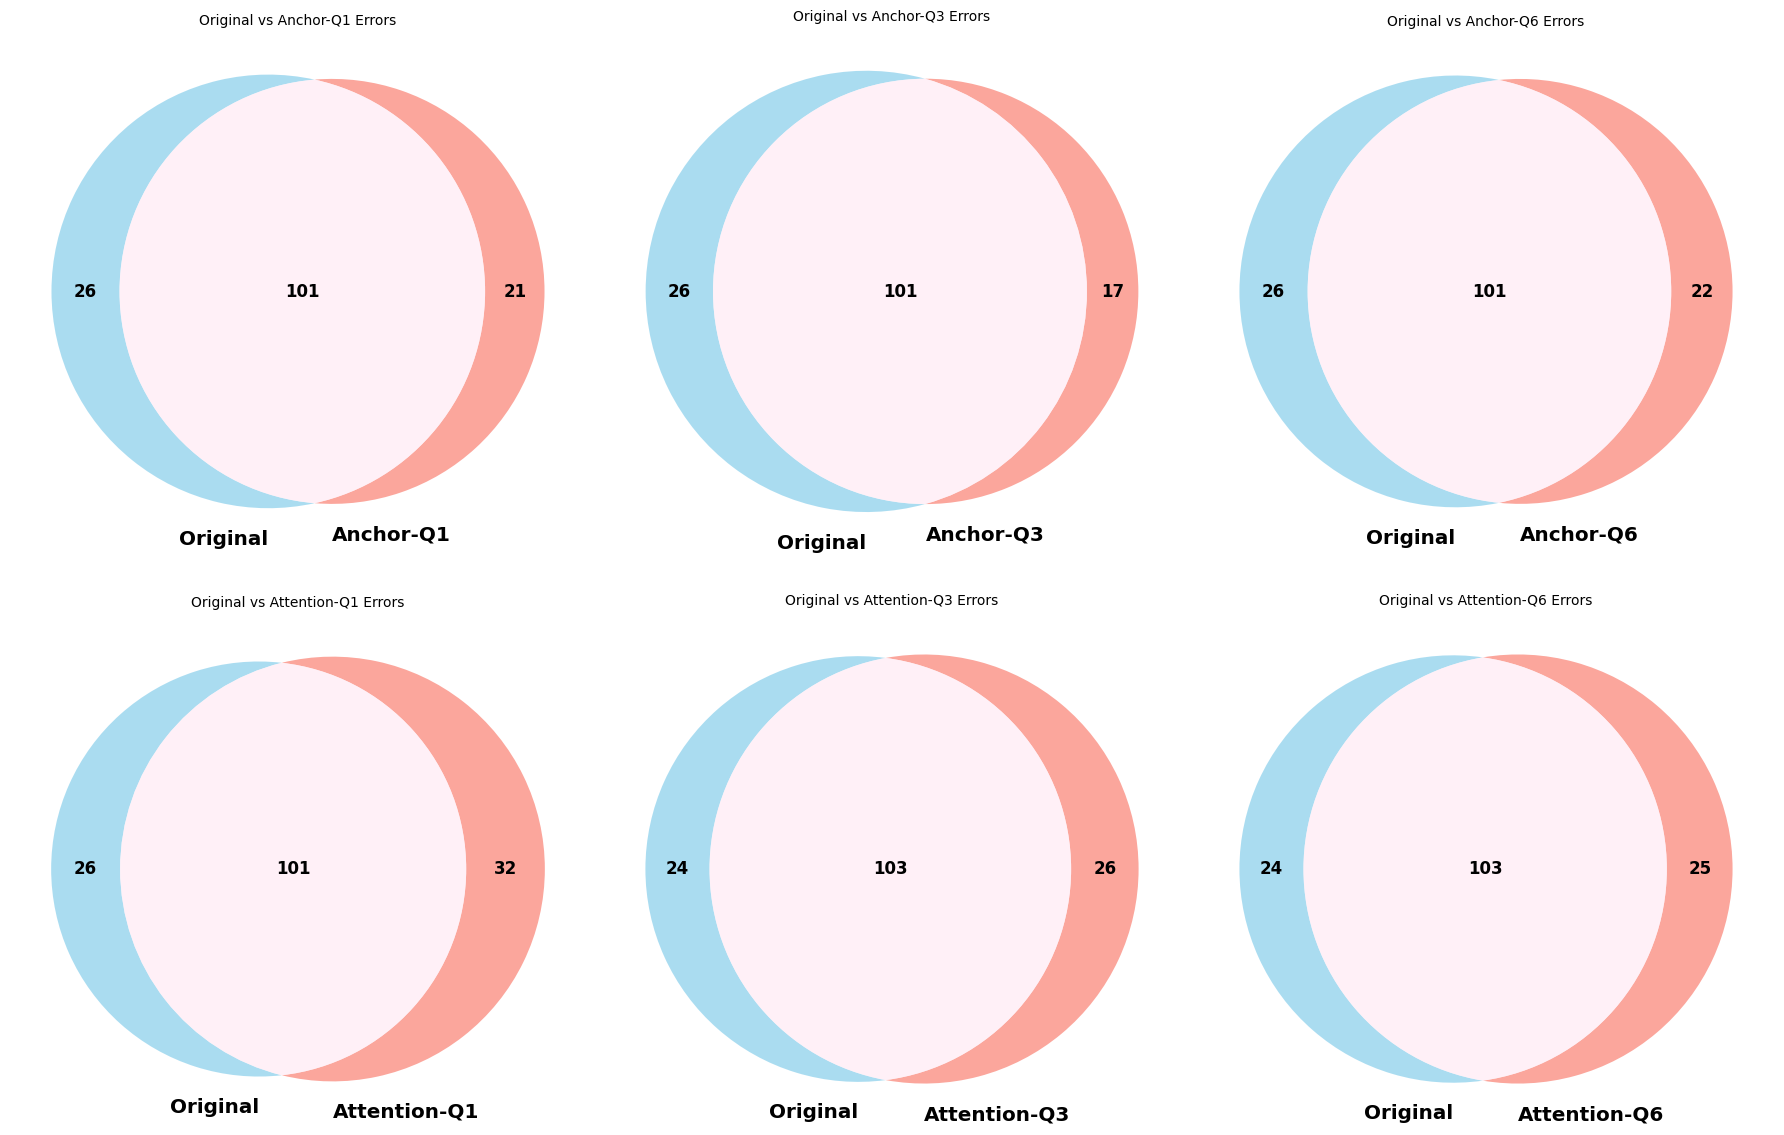

In [141]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Get original errors
original_errors = {img_id for (img_id, _, _) in incorrect_samples_original}

# Define all compressed error sets
compressed_errors = {
    'Anchor-Q1': {img_id for (img_id, _, _) in all_anchor_q1_errors},
    'Anchor-Q3': {img_id for (img_id, _, _) in all_anchor_q3_errors},
    'Anchor-Q6': {img_id for (img_id, _, _) in all_anchor_q6_errors},
    'Attention-Q1': {img_id for (img_id, _, _) in all_attn_q1_errors},
    'Attention-Q3': {img_id for (img_id, _, _) in all_attn_q3_errors},
    'Attention-Q6': {img_id for (img_id, _, _) in all_attn_q6_errors}
}

# Create 6 Venn diagrams
plt.figure(figsize=(18, 12))
for i, (name, comp_errors) in enumerate(compressed_errors.items(), 1):
    plt.subplot(2, 3, i)
    venn2([original_errors, comp_errors],
          ('Original', name),
          set_colors=('skyblue', 'salmon'),
          alpha=0.7)
    plt.title(f"Original vs {name} Errors", fontsize=12)
    plt.gca().set_facecolor('white')

plt.tight_layout()
plt.savefig('all_venn_comparisons.png', dpi=300, bbox_inches='tight')
plt.show()

# Save numerical data
venn_counts = {}
for name, comp_errors in compressed_errors.items():
    venn_counts[name] = {
        'only_original': len(original_errors - comp_errors),
        'only_compressed': len(comp_errors - original_errors),
        'both': len(original_errors & comp_errors)
    }

import pandas as pd
pd.DataFrame(venn_counts).to_csv('venn_counts.csv')

In [142]:
import pandas as pd

# Get original errors
original_errors = {img_id for (img_id, _, _) in incorrect_samples_original}

# Create comparison DataFrame
error_df = pd.DataFrame(columns=['original_distinct', 'intersect', 'compression_distinct'])

compression_sets = {
    'Anchor-Q1': {img_id for (img_id, _, _) in all_anchor_q1_errors},
    'Anchor-Q3': {img_id for (img_id, _, _) in all_anchor_q3_errors},
    'Anchor-Q6': {img_id for (img_id, _, _) in all_anchor_q6_errors},
    'Attention-Q1': {img_id for (img_id, _, _) in all_attn_q1_errors},
    'Attention-Q3': {img_id for (img_id, _, _) in all_attn_q3_errors},
    'Attention-Q6': {img_id for (img_id, _, _) in all_attn_q6_errors}
}

for name, comp_errors in compression_sets.items():
    error_df.loc[name] = {
        'original_distinct': len(original_errors - comp_errors),
        'intersect': len(original_errors & comp_errors),
        'compression_distinct': len(comp_errors - original_errors)
    }

# Add totals row
error_df.loc['TOTAL'] = error_df.sum()

print(error_df)

              original_distinct  intersect  compression_distinct
Anchor-Q1                    26        101                    21
Anchor-Q3                    26        101                    17
Anchor-Q6                    26        101                    22
Attention-Q1                 26        101                    32
Attention-Q3                 24        103                    26
Attention-Q6                 24        103                    25
TOTAL                       152        610                   143


In [145]:
import pandas as pd
import numpy as np

# Calculate net improvement
error_df['net_improvement'] = error_df['original_distinct'] - error_df['compression_distinct']

# Select only required columns
error_df = error_df[['original_distinct', 'intersect', 'compression_distinct', 'net_improvement']]

# Style with full-row highlighting
def row_highlight(row):
    if row['net_improvement'] > 0:
        return ['background-color: lightgreen'] * len(row)
    elif row['net_improvement'] < 0:
        return ['background-color: lightcoral'] * len(row)
    else:
        return [''] * len(row)

styled_df = (
    error_df.style
    .apply(row_highlight, axis=1)
    .format({
        'net_improvement': '{:+d}',
        'original_distinct': '{:d}',
        'intersect': '{:d}',
        'compression_distinct': '{:d}'
    })
    .set_caption("Compression Impact Analysis (Green = Net Improvement)")
    .set_table_styles([
        {'selector': 'th', 'props': [('font-weight', 'bold')]},
        {'selector': '', 'props': [('border', '1px solid black')]}
    ])
)

display(styled_df)

,original_distinct,intersect,compression_distinct,net_improvement
Anchor-Q1,26,101,21,+5
Anchor-Q3,26,101,17,+9
Anchor-Q6,26,101,22,+4
Attention-Q1,26,101,32,-6
Attention-Q3,24,103,26,-2
Attention-Q6,24,103,25,-1
TOTAL,152,610,143,+9
